<center><h1>MIS 6341 - ML Project 1</h1></center>



<center><b> Group 6 : Anugya, Atul Kotecha </b></center>


<center><h1>Classification Task</h1></center>

<h1>Default of Credit card</h1>

<p>This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.</p>

<h2>Attribute Information</h2>

<p>This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.</p>

<p>This dataset includes 30,000 records and 25 attributes.</p>

<h3>Columns</h3>

   1. <b>ID </b> : ID of each client
   2. <b>LIMIT_BAL </b> : Amount of given credit in NT dollars (includes individual and family/supplementary credit
   3. <b>SEX</b> : Gender (1=male, 2=female)
   4. <b>EDUCATION</b> : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
   5. <b>MARRIAGE</b> : Marital status (1=married, 2=single, 3=others)
   6. <b>AGE</b> : Age in years
   7. <b>PAY_0</b> : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
   8. <b>PAY_2</b> : Repayment status in August, 2005 (scale same as above)
   9. <b>PAY_3</b> : Repayment status in July, 2005 (scale same as above)
   10. <b>PAY_4</b> : Repayment status in June, 2005 (scale same as above)
   11. <b>PAY_5</b> : Repayment status in May, 2005 (scale same as above)
   12. <b>PAY_6</b> : Repayment status in April, 2005 (scale same as above)
   13. <b>BILL_AMT1</b> : Amount of bill statement in September, 2005 (NT dollar)
   14. <b>BILL_AMT2</b> : Amount of bill statement in August, 2005 (NT dollar)
   15. <b>BILL_AMT3</b> : Amount of bill statement in July, 2005 (NT dollar)
   16. <b>BILL_AMT4</b> : Amount of bill statement in June, 2005 (NT dollar)
   17. <b>BILL_AMT5</b> : Amount of bill statement in May, 2005 (NT dollar)
   18. <b>BILL_AMT6</b> : Amount of bill statement in April, 2005 (NT dollar)
   19. <b>PAY_AMT1</b> : Amount of previous payment in September, 2005 (NT dollar)
   20. <b>PAY_AMT2</b> : Amount of previous payment in August, 2005 (NT dollar)
   21. <b>PAY_AMT3</b> : Amount of previous payment in July, 2005 (NT dollar)
   22. <b>PAY_AMT4</b> : Amount of previous payment in June, 2005 (NT dollar)
   23. <b>PAY_AMT5</b> :  Amount of previous payment in May, 2005 (NT dollar)
   24. <b>PAY_AMT6</b> : Amount of previous payment in April, 2005 (NT dollar)
   25. <b>default.payment.next.month</b> : Default payment (1=yes, 0=no)

<h3>Source of Dataset</h3>

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

<h2><center>Pre-process Data</h2></center>

<b>1. Import Libraries and setup</b>

In [35]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

#visualization
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer # used for handling missing data


In [36]:
#import sys
#!conda install --yes --prefix {sys.prefix} pandas-profiling

In [37]:
import pandas_profiling as pp

<b>2. Data Extraction</b>

In [38]:
cc_df = pd.read_excel('default of credit card clients.xls',header= 1, sheet_name= 'Data') #using first row as header
print("Shape of the Dataset : ",cc_df.shape)

Shape of the Dataset :  (30000, 25)


<b>3. Dataset Overview</b>

In [39]:
cc_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [40]:
cc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [41]:
#pp.ProfileReport(cc_df)     # Report before data manipulation

In [42]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

From above output,we dont have any null value in the data. In following section we will drop random cells and generate null values.

<b>4. Data Transformation</b>

In [43]:
cc_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [44]:
# Column name PAY_1 is not present in data. PAY_O can be renamed as PAY_1 for consistency
# column name "default payment next month" will be converted to Default


cc_df.rename(columns={"default payment next month":"Default", 'PAY_0': 'PAY_1'},inplace=True)

In [45]:
#Code chunk to delete random cells in data

#Categorical variable and age are lft alone
df_left = cc_df.iloc[:,:6]

#Cells will be dropped from below columns

np.random.seed(seed=0)
df_right = cc_df.iloc[:, 6:].mask(np.random.random(cc_df.iloc[:, 6:].shape)<.05)

#Joining splits together

cc_df = df_left.join(df_right)

In [46]:
cc_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0
PAY_1,2.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0,NaN,0.0,-1.0,2.0,NaN
PAY_4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0


<b>Checking for null values and their percentage</b>

In [47]:
cc_df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1        1498
PAY_2        1482
PAY_3        1510
PAY_4        1516
PAY_5        1505
PAY_6        1462
BILL_AMT1    1522
BILL_AMT2    1517
BILL_AMT3    1471
BILL_AMT4    1487
BILL_AMT5    1516
BILL_AMT6    1471
PAY_AMT1     1410
PAY_AMT2     1564
PAY_AMT3     1521
PAY_AMT4     1480
PAY_AMT5     1554
PAY_AMT6     1507
Default      1513
dtype: int64

In [48]:
# Define a function to determine missing values & its percentage

def missing_values (df):
        sum_missing = df.isnull().sum()
        percent_missing = 100 * df.isnull().sum() / len(df)
        
        # Result table
        table_missing = pd.concat([sum_missing, percent_missing], axis=1)
        
        # Rename the columns
        rename_table_missing = table_missing.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        
        rename_table_missing = rename_table_missing[
            rename_table_missing.iloc[:,1] != 0].round(1)
        
        # Print some summary information
        
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(rename_table_missing.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return rename_table_missing

In [49]:
missing_values(cc_df)

Dataset has 25 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PAY_1,1498,5.0
PAY_2,1482,4.9
PAY_3,1510,5.0
PAY_4,1516,5.1
PAY_5,1505,5.0
PAY_6,1462,4.9
BILL_AMT1,1522,5.1
BILL_AMT2,1517,5.1
BILL_AMT3,1471,4.9
BILL_AMT4,1487,5.0


In [50]:
cc_df.drop(['ID'], inplace=True, axis =1)   # Dropping ID column, as it will be of no use

In [51]:
cc_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

> Education type for levels 0,4,5,6 is unknown. We can combine them. Label as 0 - unknown/ other

In [52]:
cc_df.loc[cc_df.EDUCATION >= 4, 'EDUCATION'] = 0

In [53]:
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

> Only two marital statuses are known (1 and 2). If the marital status is 0 or 3, we group them as unknown. Replacing any marital status with 3 as its value is assigned value 0.

In [54]:
cc_df.loc[cc_df.MARRIAGE == 3, 'MARRIAGE'] = 0

<b>Replacing NaN in each continuous variables with the respective Mean values</b>

In [55]:
cc_df['PAY_AMT1'] = cc_df['PAY_AMT1'].transform(lambda x:x.fillna(x.mean()))
cc_df['PAY_AMT2'] = cc_df['PAY_AMT2'].transform(lambda x:x.fillna(x.mean()))
cc_df['PAY_AMT3'] = cc_df['PAY_AMT3'].transform(lambda x:x.fillna(x.mean()))
cc_df['PAY_AMT4'] = cc_df['PAY_AMT4'].transform(lambda x:x.fillna(x.mean()))
cc_df['PAY_AMT5'] = cc_df['PAY_AMT5'].transform(lambda x:x.fillna(x.mean()))
cc_df['PAY_AMT6'] = cc_df['PAY_AMT6'].transform(lambda x:x.fillna(x.mean()))

cc_df['BILL_AMT1'] = cc_df['BILL_AMT1'].transform(lambda x:x.fillna(x.mean()))
cc_df['BILL_AMT2'] = cc_df['BILL_AMT2'].transform(lambda x:x.fillna(x.mean()))
cc_df['BILL_AMT3'] = cc_df['BILL_AMT3'].transform(lambda x:x.fillna(x.mean()))
cc_df['BILL_AMT4'] = cc_df['BILL_AMT4'].transform(lambda x:x.fillna(x.mean()))
cc_df['BILL_AMT5'] = cc_df['BILL_AMT5'].transform(lambda x:x.fillna(x.mean()))
cc_df['BILL_AMT6'] = cc_df['BILL_AMT6'].transform(lambda x:x.fillna(x.mean()))



<b>Replacing NaN in each categorical variables with the respective Mode values</b>

In [56]:
cc_df['PAY_1'] = cc_df['PAY_1'].transform(lambda x:x.fillna(x.idxmax()))
cc_df['PAY_2'] = cc_df['PAY_2'].transform(lambda x:x.fillna(x.idxmax()))
cc_df['PAY_3'] = cc_df['PAY_3'].transform(lambda x:x.fillna(x.idxmax()))
cc_df['PAY_4'] = cc_df['PAY_4'].transform(lambda x:x.fillna(x.idxmax()))
cc_df['PAY_5'] = cc_df['PAY_5'].transform(lambda x:x.fillna(x.idxmax()))
cc_df['PAY_6'] = cc_df['PAY_6'].transform(lambda x:x.fillna(x.idxmax()))

cc_df['Default'] = cc_df['Default'].transform(lambda x:x.fillna(x.idxmax()))

In [57]:
cc_df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

<b>No columns have any null values in the dataset anymore</b>

<center><h2> Exploratory Data Analysis</h2></center>

<h3>Gender wise Credit Limit </h3>

1 is Male, 2 is Female. Checking for gender wise distribution of credit limit

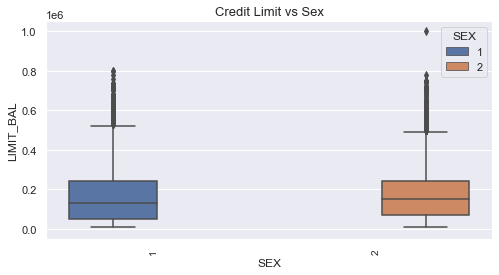

In [58]:
%matplotlib inline
plt.figure(figsize=(8,4))
sns.set(style='darkgrid', palette='deep')

plt.plot(1,2)
plot1 = sns.boxplot(data = cc_df, x = cc_df.SEX, y = cc_df['LIMIT_BAL'], hue='SEX')
plot1.set_title("Credit Limit vs Sex", fontsize = 13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 90, ha = "right", fontsize = 10)

plt.show()

> Credit limit for females is slightly greater than male

<b>Distribution of defaulters and non-defaulters</b>

In [59]:
cc_df.Default.value_counts()

0.0    23700
1.0     6300
Name: Default, dtype: int64

[Text(0, 0, 'Not Default'), Text(1, 0, 'Default')]

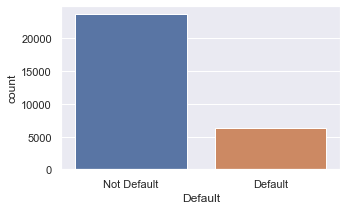

In [60]:
plt.figure(figsize=(5,3))

fig = sns.countplot(x = 'Default', data = cc_df)
fig.set_xticklabels(["Not Default", "Default"])

> Count of Non defaulters is greater than defaulters. This is as expected

<AxesSubplot:>

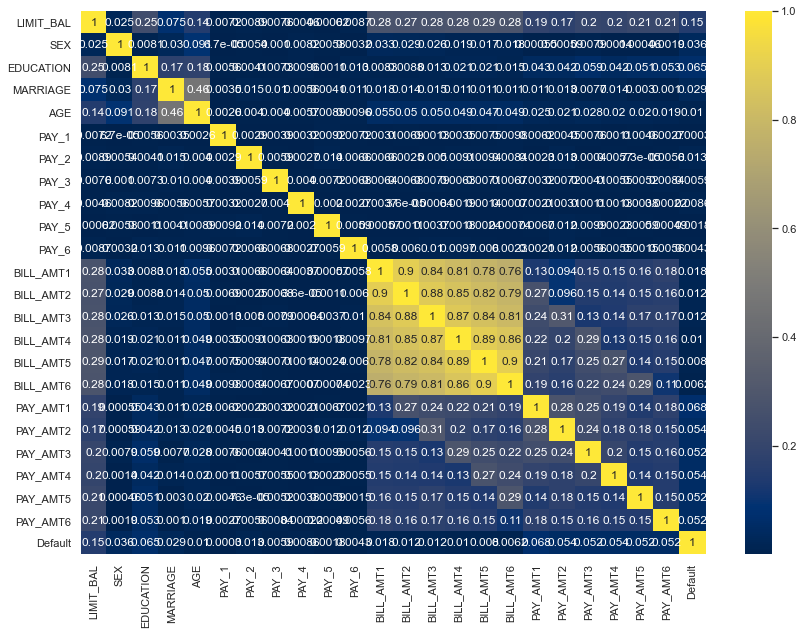

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(cc_df.corr().abs(), annot = True, cmap= 'cividis')

> Bill amounts are highly correlated

<b>Checking for Outliers in each variables through boxplot</b>

In [62]:
from numpy import mean
from numpy import std

for col in cc_df:
    data_mean, data_std = mean(cc_df[col]), std(cc_df[col])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in cc_df[col] if x < lower or x > upper]
    print('No of outliers in ' + col + ': %d' % len(outliers))

No of outliers in LIMIT_BAL: 130
No of outliers in SEX: 0
No of outliers in EDUCATION: 0
No of outliers in MARRIAGE: 0
No of outliers in AGE: 141
No of outliers in PAY_1: 1498
No of outliers in PAY_2: 1482
No of outliers in PAY_3: 1510
No of outliers in PAY_4: 1516
No of outliers in PAY_5: 1505
No of outliers in PAY_6: 1462
No of outliers in BILL_AMT1: 684
No of outliers in BILL_AMT2: 678
No of outliers in BILL_AMT3: 660
No of outliers in BILL_AMT4: 682
No of outliers in BILL_AMT5: 649
No of outliers in BILL_AMT6: 650
No of outliers in PAY_AMT1: 386
No of outliers in PAY_AMT2: 294
No of outliers in PAY_AMT3: 355
No of outliers in PAY_AMT4: 379
No of outliers in PAY_AMT5: 423
No of outliers in PAY_AMT6: 418
No of outliers in Default: 0


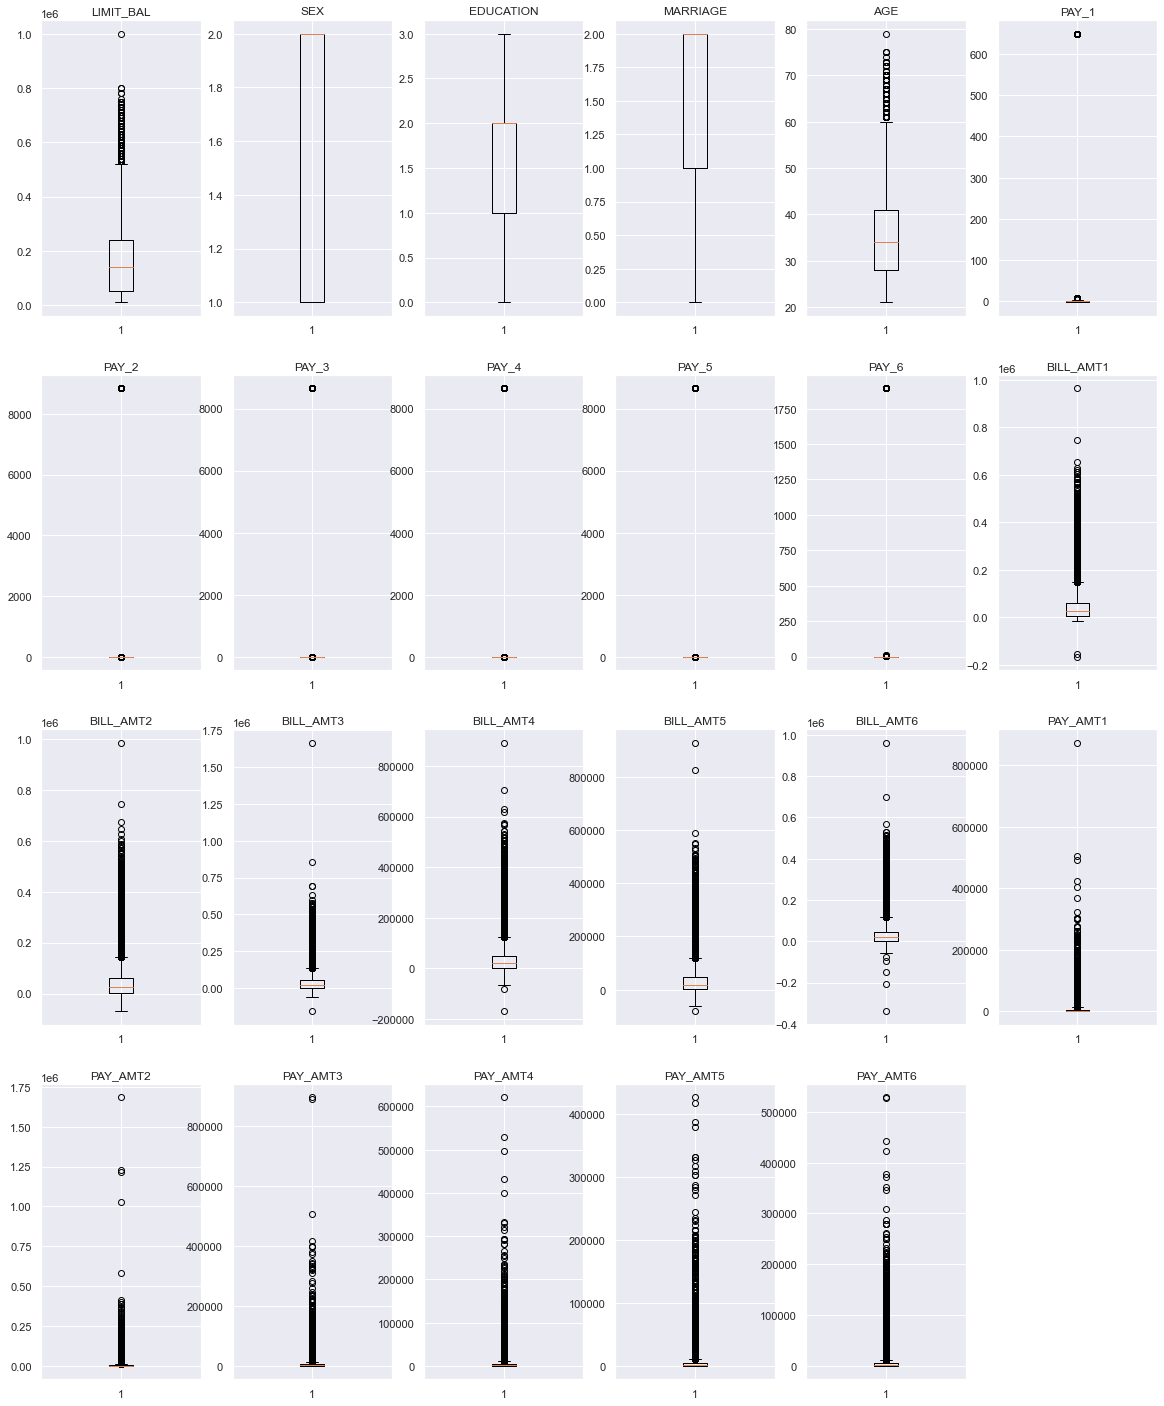

In [63]:
#Box plot for each variable

cc_col ={'LIMIT_BAL':1, 'SEX':2, 'EDUCATION':3, 'MARRIAGE':4, 'AGE':5, 'PAY_1':6,
       'PAY_2':7, 'PAY_3':8, 'PAY_4':9, 'PAY_5':10, 'PAY_6':11, 'BILL_AMT1':12, 'BILL_AMT2':13,
       'BILL_AMT3':14, 'BILL_AMT4':15, 'BILL_AMT5':16, 'BILL_AMT6':17, 'PAY_AMT1':18,
       'PAY_AMT2':19, 'PAY_AMT3':20, 'PAY_AMT4':21, 'PAY_AMT5':22, 'PAY_AMT6':23}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,25))

for variables,i in cc_col.items():
                     plt.subplot(4,6,i)
                     plt.boxplot(cc_df[variables])
                     plt.title(variables)

plt.show()

In [1]:
#pp.ProfileReport(cc_df)     # Report after data manipulation

<center><h2>Model Development</h2></center>

<h3>Classification task:</h3>

<ul>
    <li>Decide about a good evaluation strategy beside accuracy and justify your choice.</li>
    <li>Apply all the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.</li>
    <li>Your submission should have at least the following classification models: </li>
    <ul>
            <li>KNN classification</li>
            <li>Logistic Regression</li>
            <li>Linear Support Vector Machine</li>
            <li>Kerenilzed Support Vector Machine (rbf, poly, and linear)</li>
            <li>Decision Tree.</li></ul>
    <li>Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.</li>
    
</ul>


<b>Data Splitting - Train and Test Data</b>

In [65]:
# default payment next month' will be taget variable

X = cc_df.drop(['Default'],axis =1)    # all variables except target

y = cc_df['Default']     #variable of interest

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, random_state = 0)

<h4>Scaling</h4>

> We have used MinMaxScaler which essentially shrinks the range such that the range is now between 0 and 1. It retains the outliers in the data and it doesn't change the relative position

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_1)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.151899,1.0,0.333333,1.0,0.111111,0.003072,0.000226,0.000231,0.000231,0.000231,...,0.102657,0.233001,0.128419,0.327434,0.002290,0.001187,0.005624,0.000705,0.012338,0.000000
1,0.151899,1.0,1.000000,0.5,0.592593,1.000000,1.000000,0.000231,0.000231,0.000231,...,0.098635,0.221581,0.156817,0.353090,0.002682,0.001417,0.002583,0.002473,0.006316,0.005044
2,0.164557,0.0,1.000000,0.5,0.314815,0.006144,0.000452,0.000462,0.000462,0.000462,...,0.112152,0.348459,0.304163,0.456247,0.025757,0.000000,0.005916,0.004187,0.005927,0.010054
3,0.329114,1.0,0.666667,0.5,0.222222,0.001536,0.000113,0.000116,0.000116,0.000116,...,0.088303,0.195647,0.106909,0.337067,0.010159,0.002118,0.005916,0.012805,0.010307,0.009861
4,0.265823,1.0,0.666667,0.5,0.592593,0.006144,0.000226,0.000231,0.000231,0.000231,...,0.208887,0.439110,0.419864,0.529155,0.009719,0.004809,0.008998,0.007748,0.021269,0.012596


In [67]:
X_test = scaler.transform(X_test_1)
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.012658,0.0,0.333333,1.0,0.222222,0.004608,0.000452,0.000462,0.000462,1.000000,...,0.096808,0.214917,0.125111,0.345238,0.000000,0.001342,0.000000,0.002576,0.000000,0.001222
1,0.012658,1.0,0.666667,1.0,0.259259,0.003072,0.000226,0.000462,0.000231,0.000231,...,0.096557,0.215541,0.123947,0.345923,0.003892,0.000000,0.001125,0.000000,0.002577,0.000000
2,0.278481,1.0,0.333333,0.5,0.425926,0.004608,0.000113,0.000116,0.000116,0.000116,...,0.087917,0.194937,0.094646,0.326684,0.006515,0.001706,0.001049,0.000000,0.000000,0.000000
3,0.113924,0.0,0.666667,0.5,0.388889,0.003072,0.000226,0.000231,0.000231,0.000231,...,0.095205,0.214124,0.123598,0.346184,0.005724,0.001187,0.002250,0.003221,0.005154,0.003794
4,0.177215,0.0,0.333333,1.0,0.148148,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.086801,0.201250,0.102569,0.334197,0.006515,0.000495,0.007298,0.008298,0.020184,0.013526


In [68]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

# checking shape after split

X_train: (22500, 23)
y_train: (22500,)
X_test: (7500, 23)
y_test: (7500,)


<h2>Algorithms</h2>

<h3>1. K-Nearest Neighbor (KNN) Classification</h3>

In [69]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

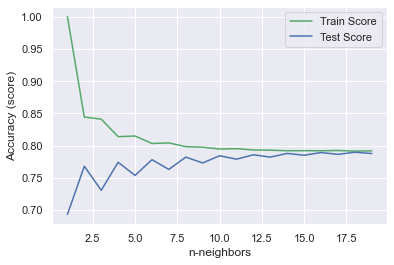

In [70]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n-neighbors')
plt.ylabel('Accuracy (score)')
plt.legend()

From the graph, number of neaighbors, k=10 seems to be best parameter.

In [71]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print ("No of Neighbors:", 10)
print('Train score: {:.4f}%'.format(knn.score(X_train, y_train)*100))
print('Train score: {:.4f}%'.format(knn.score(X_test, y_test)*100))

No of Neighbors: 10
Train score: 79.4667%
Train score: 78.4267%


<b>Cross validation scores for KNN Classifier</b>

In [72]:
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

pd.DataFrame({'Cross-validation score': knn_scores})

,Cross-validation score
0,0.782667
1,0.780889
2,0.781778
3,0.783111
4,0.774889


In [73]:
print("Average cross-validation score is: {:.2f}".format(knn_scores.mean()))

Average cross-validation score is: 0.78


<b>Applying Grid Search on KNN Classifier</b>

In [74]:
from pprint import pprint
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}


In [75]:
param_grid_knn = {'n_neighbors':range(1,20), 'p': [1,2],
            'weights': ['distance','uniform'],
            'metric': ['euclidean','manhattan']}

CV_knn_class = GridSearchCV(KNeighborsClassifier(), param_grid_knn , verbose = 1, cv = 5, n_jobs = -1)

GS_results_KNN = CV_knn_class.fit(X_train, y_train)

Fitting 5 folds for each of 152 candidates, totalling 760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 760 out of 760 | elapsed:  9.7min finished


In [76]:
round(CV_knn_class.score(X_test,y_test),4)

0.7885

In [78]:
print("Best score- KNN grid serach: ")
GS_results_KNN.best_score_

Best score- KNN grid serach: 


0.7861333333333334

In [79]:
print("Best Estimator- KNN grid serach: ")
GS_results_KNN.best_estimator_

Best Estimator- KNN grid serach: 


KNeighborsClassifier(metric='manhattan', n_neighbors=18, p=1)

In [80]:
print("Best parameters- KNN grid serach: ")
GS_results_KNN.best_params_

Best parameters- KNN grid serach: 


{'metric': 'manhattan', 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}

<b>Using best parameters from Grid Search for KNN Classifier</b>

In [81]:
best_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 18, weights = 'uniform', algorithm ='auto',p = 1)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print('Train score: {:.4f} %'.format(best_knn.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_knn.score(X_test, y_test)*100))

Train score: 79.2800 %
Test score: 78.8533 %


In [82]:
print(classification_report(y_pred = y_pred_knn, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      5946
         1.0       0.32      0.02      0.04      1554

    accuracy                           0.79      7500
   macro avg       0.56      0.50      0.46      7500
weighted avg       0.70      0.79      0.71      7500



In [83]:
print(confusion_matrix(y_pred = y_pred_knn, y_true = y_test))

[[5885   61]
 [1525   29]]


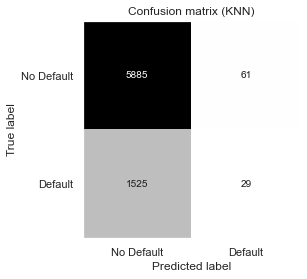

In [84]:
import mglearn
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_knn, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix (KNN)")
plt.gca().invert_yaxis()

In [85]:
Knn_recall_Score = recall_score(y_test, best_knn.predict(X_test))
print('Recall score : {:.4f} '.format(recall_score(y_test, best_knn.predict(X_test))))

Recall score : 0.0187 


In [86]:
Knn_precision_score=precision_score(y_test, best_knn.predict(X_test))
print('Precision score : {:.4f} '.format(precision_score(y_test, best_knn.predict(X_test))))

Precision score : 0.3222 


In [87]:
Knn_f1_score = f1_score(y_test, best_knn.predict(X_test))
print('F1 score : {:.4f} '.format(f1_score(y_test, best_knn.predict(X_test))))

F1 score : 0.0353 


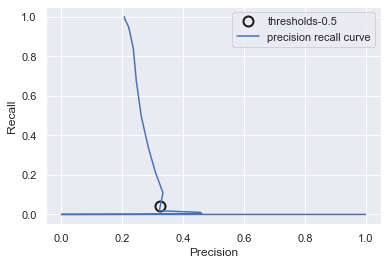

In [88]:
import mglearn

%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_knn.predict_proba(X_test)[:,1])

close_zero = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label = "thresholds-0.5", fillstyle = "none", c = 'k', mew = 2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [89]:
report_table = [['KNN Classification', 'K=18', best_knn.score(X_train, y_train)*100, best_knn.score(X_test, y_test)*100,f1_score(y_test, best_knn.predict(X_test))]]

In [ ]:
#report_table

<b>Result - False Positive is 61, false negatives are 1525 , the recall score is 0.0187 and F1 score is 0.0353 . Default = 1 is class of interest

<h3>2. Logistic Regression</h3>

In [90]:
c_value = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_value:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver = 'lbfgs')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l2.append(log_l2.score(X_test, y_test))
    


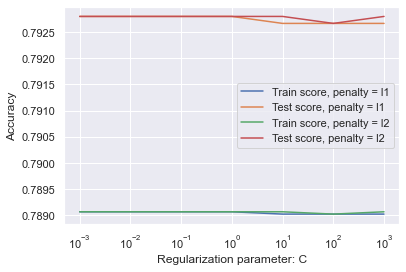

In [91]:
%matplotlib inline
plt.plot(c_value, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_value, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_value, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_value, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')

plt.ylabel('Accuracy')
plt.xscale('log')



> At c=10 & l2 penalty, test accuracy is best. So that will be out initial parameter

In [92]:
logistic = LogisticRegression(penalty = 'l2', C=10)

logistic.fit(X_train, y_train)

print('Train score: {:.4f}%'.format(logistic.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(logistic.score(X_test, y_test)*100))

Train score: 78.9067%
Test score: 79.2800%


<b>Cross validation scores for Logistic Regression</b>

In [93]:
scores = cross_val_score(logistic, X_train,y_train)
pd.DataFrame({"Cross-validation scores": scores})


,Cross-validation scores
0,0.789111
1,0.789333
2,0.789111
3,0.789111
4,0.788667


In [94]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


<b>Cross validation scores for Logistic Regression with cross folds</b>

In [95]:
scores1 = cross_val_score(logistic, X_train,y_train, cv=5)

pd.DataFrame({'Cross-validation scores' : scores1})

,Cross-validation scores
0,0.789111
1,0.789333
2,0.789111
3,0.789111
4,0.788667


In [96]:
print("Average cross-validation score: {:.2f}".format(scores1.mean()))

Average cross-validation score: 0.79


<b>Applying Grid Search with Logistic Regression</b>

In [97]:
from pprint import pprint
pprint(logistic.get_params())

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [98]:
param_grid_logit = { 'max_iter' : range(1,200), 'penalty' : ['l1','l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

CV_logit_class = GridSearchCV(estimator = logistic, param_grid = param_grid_logit, cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_logit = CV_logit_class.fit(X_train, y_train)

best_parameters_logit_class = CV_logit_class.best_params_
print(best_parameters_logit_class)

Fitting 5 folds for each of 2786 candidates, totalling 13930 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 5106 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5656 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6802 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8922 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9872 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 11322 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 12968 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 13930 out of 13930 | elapsed:  7.2min finished


{'C': 100, 'max_iter': 63, 'penalty': 'l2'}


In [99]:
print("Best score- Logistic grid serach: ")
GS_results_logit.best_score_

Best score- Logistic grid serach: 


0.7891111111111111

In [100]:
print("Best parameters- Logistic grid serach: ")
best_parameters_logit_class

Best parameters- Logistic grid serach: 


{'C': 100, 'max_iter': 63, 'penalty': 'l2'}

<b>Using best parameters, c=100, max_iter = 63 & penalty =l2,  for Logistic Regression</b>

In [101]:
best_logistic = LogisticRegression(penalty ='l2', C = 100, max_iter = 63)

best_logistic.fit(X_train,y_train)
y_pred_log = best_logistic.predict(X_test)

print('Train score: {:.4f}%'.format(best_logistic.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(best_logistic.score(X_test, y_test)*100))

Train score: 78.8933%
Test score: 79.2800%


In [102]:
print("Grid Search Best Score: {:.2f}".format(GS_results_logit.best_score_))

Grid Search Best Score: 0.79


In [103]:
print(classification_report(y_pred = y_pred_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      5946
         1.0       0.00      0.00      0.00      1554

    accuracy                           0.79      7500
   macro avg       0.40      0.50      0.44      7500
weighted avg       0.63      0.79      0.70      7500



In [104]:
print(confusion_matrix(y_pred=y_pred_log,y_true=y_test))

[[5946    0]
 [1554    0]]


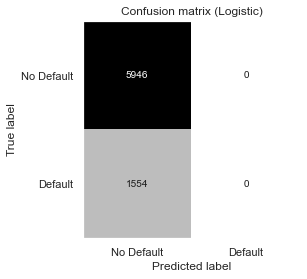

In [105]:
import mglearn
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_log, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix (Logistic)")
plt.gca().invert_yaxis()

In [106]:
Logistic_recallScore = recall_score(y_test, best_logistic.predict(X_test))
print("recall score: {:.2f}".format(recall_score(y_test, best_logistic.predict(X_test))))

recall score: 0.00


In [107]:
Logistic_precision_score = precision_score(y_test, best_logistic.predict(X_test))
print("precision score: {:.2f}".format(precision_score(y_test, best_logistic.predict(X_test))))

precision score: 0.00


In [108]:
Logistic_f1_score = recall_score(y_test,best_logistic.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test,best_logistic.predict(X_test))))

f1 score: 0.00


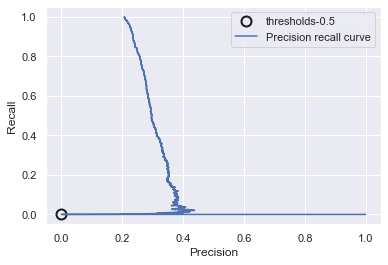

In [109]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_logistic.predict_proba(X_test)[:,1])

close_zero = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="thresholds-0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [110]:
report_table = report_table + [['Logistic Regression', 'C=100 & max iter =63', best_logistic.score(X_train, y_train)*100, best_logistic.score(X_test, y_test)*100,f1_score(y_test,best_logistic.predict(X_test))]]

<b>Result - False Positives is 0, false negatives are 1554 , the recall score is 0.0 and F1 score is 0.0

<h3>3. Linear Support Vector Machine Classifier</h3>

In [111]:
from sklearn.svm import LinearSVC,SVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

lin_train_score_list = []
lin_test_score_list = []

for c in c_range:
    lin_svm = LinearSVC(C = c)
    lin_svm.fit(X_train, y_train)
    lin_train_score_list.append(lin_svm.score(X_train, y_train))
    lin_test_score_list.append(lin_svm.score(X_test, y_test))

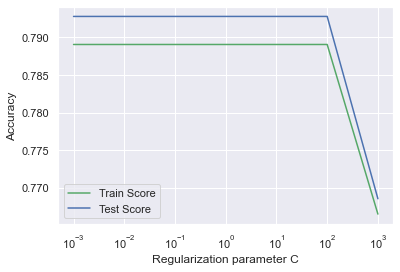

In [112]:
%matplotlib inline

plt.plot(c_range, lin_train_score_list, label = 'Train Score', c = 'g')
plt.plot(c_range, lin_test_score_list, label = 'Test Score', c = 'b')
plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()

> Accuracy drops after C=100

In [113]:
lin_svm = LinearSVC(C = 100)
lin_svm.fit(X_train, y_train)

print('Train score: {:.4f} %'.format(lin_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lin_svm.score(X_test, y_test)*100))

Train score: 78.9067 %
Test score: 79.2800 %


<b>Applying Grid Search with Linear Support Vector Machine Classifier</b>

In [114]:
param_grid_linearSVM = { 'max_iter' : range(1,200),'C' : [ 0.01, 0.1, 1, 10, 100, 1000]}

CV_linearSVM_class = GridSearchCV(estimator = lin_svm, param_grid = param_grid_linearSVM ,cv = 5, verbose = 1, n_jobs = -1, return_train_score = True)
GS_results_linearSVM = CV_linearSVM_class.fit(X_train, y_train)

best_parameters_linearSVM_class = CV_linearSVM_class.best_params_
print(best_parameters_linearSVM_class)

Fitting 5 folds for each of 1194 candidates, totalling 5970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 2322 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2872 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3522 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4272 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5122 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 5970 out of 5970 | elapsed: 13.3min finished


{'C': 10, 'max_iter': 152}


In [115]:
print("Best score- Linear SVM grid serach: ")
GS_results_linearSVM.best_score_


Best score- Linear SVM grid serach: 


0.7891111111111112

In [116]:
print("Best parameters- Linear SVM grid serach: ")
best_parameters_linearSVM_class


Best parameters- Linear SVM grid serach: 


{'C': 10, 'max_iter': 152}

<b>Using best parameters from GridSearch for Linear SVM Classification</b>

In [117]:
best_lin_SVM = LinearSVC(C = 10 ,max_iter = 141)
best_lin_SVM.fit(X_train, y_train)
y_pred_SVM = best_lin_SVM.predict(X_test)
 
print('Train score: {:.4f} %'.format(best_lin_SVM.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_lin_SVM.score(X_test, y_test)*100))

Train score: 78.9022 %
Test score: 79.2667 %


In [118]:
print(classification_report(y_pred = y_pred_SVM, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      5946
         1.0       0.00      0.00      0.00      1554

    accuracy                           0.79      7500
   macro avg       0.40      0.50      0.44      7500
weighted avg       0.63      0.79      0.70      7500



In [119]:
print(confusion_matrix(y_pred = y_pred_SVM, y_true = y_test))

[[5945    1]
 [1554    0]]


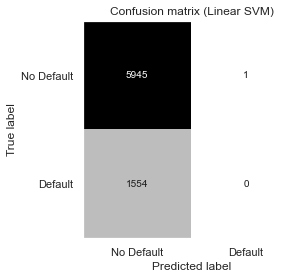

In [120]:
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_SVM, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix (Linear SVM)")
plt.gca().invert_yaxis()

In [121]:
LinearSVC_recall_score = recall_score(y_test,best_lin_SVM.predict(X_test))
print("recall score: {:.2f}".format(recall_score(y_test, best_lin_SVM.predict(X_test))))

recall score: 0.00


In [122]:
LinearSVC_precision_score = precision_score(y_test, best_lin_SVM.predict(X_test))
print("preision score: {:.2f}".format(precision_score(y_test,best_lin_SVM.predict(X_test))))

preision score: 0.00


In [123]:
LinearSVC_f1_score = f1_score(y_test,best_lin_SVM.predict(X_test))
print("f1 score: {:.2f}".format(f1_score(y_test,best_lin_SVM.predict(X_test))))

f1 score: 0.00


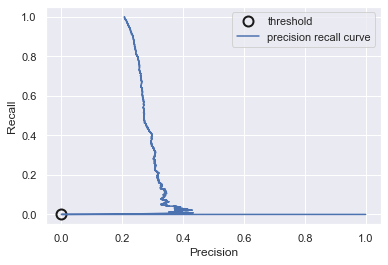

In [124]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_lin_SVM.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

<b>Cross validation scores for Linear Support Vector Machine Classifier with folds</b>

In [125]:
svm_cls_scores = cross_val_score(best_lin_SVM, X_train, y_train, cv=5)

pd.DataFrame({'Cross-validation scores (Linear SVM)':svm_cls_scores })

,Cross-validation scores (Linear SVM)
0,0.788889
1,0.789111
2,0.789111
3,0.789111
4,0.788667


In [126]:
print("Average cross-validation score: {:.2f}".format(svm_cls_scores.mean()))

Average cross-validation score: 0.79


In [127]:
report_table = report_table + [['Linear SVM Classifier', 'C=10 & Max_iter=141', best_lin_SVM.score(X_train, y_train)*100, best_lin_SVM.score(X_test, y_test)*100,f1_score(y_test,best_lin_SVM.predict(X_test))]]

<b>For Linear SVM Classifier , there are 0 False Positives and 1554 False Negative, recall value 0.0 and F1 score is 0.0

<h3>4. Kernalized Support Vector Machine</h3>

<b>Sample of 30000 for Kernalized SVM will be too computationally expensive. We can reduce sample size to 1500 to run this model</b>

In [128]:
cc_new = cc_df.sample(n = 1500, random_state= 2)

cc_new.shape

(1500, 24)

In [129]:
#Making train test split

X_sample = cc_new.drop(['Default'],axis =1)

y_sample = cc_new['Default']

X_train_org_sample, X_test_org_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, random_state = 2)

In [130]:
scaler_new = MinMaxScaler()
X_train_sample = scaler_new.fit_transform(X_train_org_sample)
pd.DataFrame(X_train_sample).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.444444,0.0,0.333333,0.0,0.693878,0.003072,0.000226,0.000462,0.000231,0.000231,...,0.039597,0.043905,0.060320,0.050719,0.016542,0.000000,0.004067,0.006807,0.005154,0.003783
1,0.126984,1.0,0.666667,0.5,0.693878,0.006144,0.000452,0.000231,0.000231,0.000231,...,0.149041,0.079407,0.097532,0.066775,0.026680,0.010521,0.012202,0.020422,0.005154,0.003783
2,0.031746,1.0,0.333333,1.0,0.040816,0.003072,1.000000,0.000231,0.000231,0.000231,...,0.057624,0.063525,0.110173,0.051008,0.037929,0.012275,0.008135,0.023826,0.005154,0.001892
3,0.031746,0.0,0.333333,0.5,0.285714,0.004608,0.000452,0.000462,0.000462,0.000116,...,0.055953,0.052133,0.081419,0.063131,0.006665,0.007063,0.000024,0.174949,0.002061,0.003762
4,0.650794,1.0,0.666667,1.0,0.163265,0.003072,0.000226,0.000231,0.000231,0.000231,...,0.454001,0.513116,0.564535,0.555447,0.066649,0.035772,0.044740,0.146358,0.030922,0.028373


In [131]:
X_test_sample = scaler_new.transform(X_test_org_sample)
pd.DataFrame(X_test_sample).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.269841,1.0,0.666667,1.0,0.081633,0.003072,0.000226,0.000231,0.000231,0.000462,...,0.034387,0.039705,0.054136,0.043059,0.008378,0.003938,0.007638,0.000000,0.002577,0.000000
1,0.063492,0.0,0.333333,1.0,0.428571,0.001536,0.000113,1.000000,0.000231,0.000231,...,0.046782,0.050950,0.064725,0.052719,0.151027,0.004559,0.002111,0.032752,0.001327,0.000999
2,0.015873,0.0,0.666667,1.0,0.081633,0.004608,0.000452,0.000578,0.000462,0.000231,...,0.096721,0.059858,0.074398,0.060809,0.021994,0.000000,0.000000,0.000014,0.000990,0.004706
3,0.380952,1.0,0.333333,0.5,0.530612,0.001536,0.000113,0.000116,0.000116,1.000000,...,0.101062,0.059353,0.137578,0.105634,0.070748,0.174740,0.080801,0.381715,0.117100,0.056588
4,0.095238,1.0,0.666667,0.0,0.061224,0.004608,0.000452,0.000231,0.000231,0.000231,...,0.028398,0.027136,0.040830,0.029401,0.000000,0.005261,0.000000,0.000000,0.002894,0.000000


In [132]:
print("X_train:",X_train_sample.shape)
print("y_train:",y_train_sample.shape)
print("X_test:",X_test_sample.shape)
print("y_test:",y_test_sample.shape)

X_train: (1125, 23)
y_train: (1125,)
X_test: (375, 23)
y_test: (375,)


In [133]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import metrics

In [134]:
c_range = [0.001,0.01, 0.1, 1, 10,100]

train_score_list = []
test_score_list = []
for C in c_range:
    
    kernal_clf = svm.SVC(kernel = 'linear', C = C)
    kernal_clf.fit(X_train_sample,y_train_sample) 
    train_score_list.append(kernal_clf.score(X_train_sample,y_train_sample))
    test_score_list.append(kernal_clf.score(X_test_sample, y_test_sample))

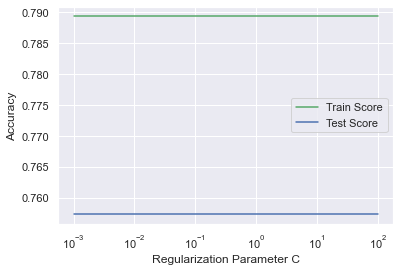

In [135]:
%matplotlib inline
plt.plot(c_range, train_score_list, label = 'Train Score', c = 'g')
plt.plot(c_range, test_score_list, label = 'Test Score', c='b')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')

plt.legend()

In [136]:
kernal_clf = svm.SVC(kernel = 'linear', C = 0.001)
kernal_clf.fit(X_train_sample, y_train_sample) 
print("train score {:.4f} %".format(kernal_clf.score(X_train_sample, y_train_sample)*100))
print("test score: {:.4f} %".format(kernal_clf.score(X_test_sample, y_test_sample)*100))

train score 78.9333 %
test score: 75.7333 %


<b>Grid search with SVM including cross validation</b>

In [138]:
best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma = gamma, C=C)
        
        # perform cross-validation
        CV_scores = cross_val_score(svm, X_train_sample, y_train_sample, cv=5)
        
        # compute mean cross-validation accuracy
        CV_score = np.mean(CV_scores)
        
        # if we got a better score, store the score and parameters
        if CV_score > best_score:
            best_score = CV_score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_train_sample, y_train_sample)

SVC(C=0.001, gamma=0.001)

In [139]:
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','poly','linear']}

In [140]:
from sklearn.model_selection import GridSearchCV

KernelSVC = SVC()
GS_KernelSVC = GridSearchCV(KernelSVC, kernelSVC_params, cv = 5, return_train_score= True, n_jobs= -1)
GS_KernelSVC.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True)

In [141]:
print("Best score- Kernelized SVM grid serach: ")
GS_KernelSVC.best_score_


Best score- Kernelized SVM grid serach: 


0.7893333333333334

In [142]:
print("Best parameters- Kernelized SVM grid serach: ")
GS_KernelSVC.best_params_


Best parameters- Kernelized SVM grid serach: 


{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

<b> a. Kernel Type : 'rbf'

In [143]:
best_svm_rbf = SVC(C = 0.001, cache_size = 200, gamma = 0.001, kernel= 'rbf', verbose = True)

best_svm_rbf.fit(X_train_sample,y_train_sample)
y_pred_kernel_rbf = best_svm_rbf.predict(X_test_sample)

print('Train score: {:.4f} %'.format(best_svm_rbf.score(X_train_sample, y_train_sample)*100))
print('Test score: {:.4f} %'.format(best_svm_rbf.score(X_test_sample, y_test_sample)*100))

[LibSVM]Train score: 78.9333 %
Test score: 75.7333 %


In [144]:
print(classification_report(y_pred_kernel_rbf,y_test_sample))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       375
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76       375
   macro avg       0.50      0.38      0.43       375
weighted avg       1.00      0.76      0.86       375



In [145]:
print(confusion_matrix(y_pred = y_pred_kernel_rbf,y_true = y_test_sample))

[[284   0]
 [ 91   0]]


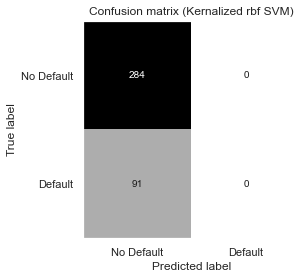

In [146]:
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_kernel_rbf, y_true = y_test_sample), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix (Kernalized rbf SVM)")
plt.gca().invert_yaxis()

In [147]:
KernalizedSVM_rbf_recall_score = recall_score(y_test_sample, best_svm_rbf.predict(X_test_sample))
print("Recall score: {:.2f}".format(recall_score(y_test_sample, best_svm_rbf.predict(X_test_sample))))

Recall score: 0.00


In [148]:
KernalizedSVM_rbf_precision_score = precision_score(y_test_sample, best_svm_rbf.predict(X_test_sample))
print("Preision score: {:.2f}".format(precision_score(y_test_sample, best_svm_rbf.predict(X_test_sample))))

Preision score: 0.00


In [149]:
KernalizedSVM_rbf_f1_score = f1_score(y_test_sample, best_svm_rbf.predict(X_test_sample))
print("F1 score: {:.2f}".format(f1_score(y_test_sample, best_svm_rbf.predict(X_test_sample))))

F1 score: 0.00


In [150]:
report_table = report_table + [['Kernalized SVM rbg Classifier', 'C=0.001 & gamma = 0.001' , best_svm_rbf.score(X_train_sample, y_train_sample)*100, best_svm_rbf.score(X_test_sample, y_test_sample)*100,f1_score(y_test_sample, best_svm_rbf.predict(X_test_sample))]]

<b>For Kernelized SVM rbf classifier with small data , there are 0 False Positives and 91 False Negative, recall value 0.0 and F1 score is 0.0

<b> b. Kernel Type : 'Linear'

In [152]:
best_svm_linear = SVC(C = 0.001, cache_size = 200, gamma = 0.001, kernel= 'linear', verbose = True)

best_svm_linear.fit(X_train_sample,y_train_sample)
y_pred_kernel_linear = best_svm_linear.predict(X_test_sample)

print('Train score: {:.4f} %'.format(best_svm_linear.score(X_train_sample, y_train_sample)*100))
print('Test score: {:.4f} %'.format(best_svm_linear.score(X_test_sample, y_test_sample)*100))

[LibSVM]Train score: 78.9333 %
Test score: 75.7333 %


In [153]:
print(classification_report(y_pred_kernel_linear,y_test_sample))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       375
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76       375
   macro avg       0.50      0.38      0.43       375
weighted avg       1.00      0.76      0.86       375



In [154]:
print(confusion_matrix(y_pred = y_pred_kernel_linear,y_true = y_test_sample))

[[284   0]
 [ 91   0]]


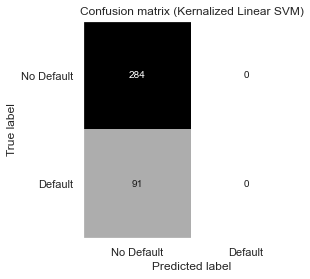

In [155]:
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_kernel_linear, y_true = y_test_sample), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix (Kernalized Linear SVM)")
plt.gca().invert_yaxis()

In [156]:
KernalizedSVM_linear_recall_score = recall_score(y_test_sample, best_svm_linear.predict(X_test_sample))
print("Recall score: {:.2f}".format(recall_score(y_test_sample, best_svm_linear.predict(X_test_sample))))

Recall score: 0.00


In [157]:
KernalizedSVM_linear_precision_score = precision_score(y_test_sample, best_svm_linear.predict(X_test_sample))
print("Preision score: {:.2f}".format(precision_score(y_test_sample, best_svm_linear.predict(X_test_sample))))

Preision score: 0.00


In [158]:
KernalizedSVM_linear_f1_score = f1_score(y_test_sample, best_svm_linear.predict(X_test_sample))
print("F1 score: {:.2f}".format(f1_score(y_test_sample, best_svm_linear.predict(X_test_sample))))

F1 score: 0.00


In [159]:
report_table = report_table + [['Kernalized SVM Linear Classifier', 'C=0.001 & gamma = 0.001' , best_svm_linear.score(X_train_sample, y_train_sample)*100, best_svm_linear.score(X_test_sample, y_test_sample)*100,f1_score(y_test_sample, best_svm_linear.predict(X_test_sample))]]

<b>For Kernelized SVM linear classifier with small data , there are 0 False Positives and 91 False Negative, recall value 0.0 and F1 score is 0.0

<b> c. Kernel Type : 'Poly'

In [160]:
best_svm_poly = SVC(C = 0.001, cache_size = 200, gamma = 0.001, kernel= 'poly', verbose = True)

best_svm_poly.fit(X_train_sample,y_train_sample)
y_pred_kernel_poly = best_svm_poly.predict(X_test_sample)

print('Train score: {:.4f} %'.format(best_svm_poly.score(X_train_sample, y_train_sample)*100))
print('Test score: {:.4f} %'.format(best_svm_poly.score(X_test_sample, y_test_sample)*100))

[LibSVM]Train score: 78.9333 %
Test score: 75.7333 %


In [161]:
print(classification_report(y_pred_kernel_poly,y_test_sample))

              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86       375
         1.0       0.00      0.00      0.00         0

    accuracy                           0.76       375
   macro avg       0.50      0.38      0.43       375
weighted avg       1.00      0.76      0.86       375



In [162]:
print(confusion_matrix(y_pred = y_pred_kernel_poly,y_true = y_test_sample))

[[284   0]
 [ 91   0]]


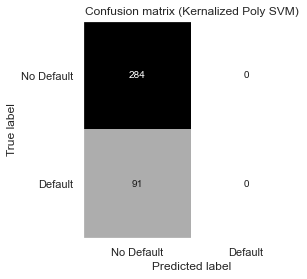

In [163]:
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_kernel_poly, y_true = y_test_sample), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix (Kernalized Poly SVM)")
plt.gca().invert_yaxis()

In [164]:
KernalizedSVM_poly_recall_score = recall_score(y_test_sample, best_svm_poly.predict(X_test_sample))
print("Recall score: {:.2f}".format(recall_score(y_test_sample, best_svm_poly.predict(X_test_sample))))

Recall score: 0.00


In [165]:
KernalizedSVM_poly_precision_score = precision_score(y_test_sample, best_svm_poly.predict(X_test_sample))
print("Preision score: {:.2f}".format(precision_score(y_test_sample, best_svm_poly.predict(X_test_sample))))

Preision score: 0.00


In [166]:
KernalizedSVM_poly_f1_score = f1_score(y_test_sample, best_svm_poly.predict(X_test_sample))
print("F1 score: {:.2f}".format(f1_score(y_test_sample, best_svm_poly.predict(X_test_sample))))

F1 score: 0.00


In [167]:
report_table = report_table + [['Kernalized poly SVM Classifier', 'C=0.001 & gamma = 0.001' , best_svm_poly.score(X_train_sample, y_train_sample)*100, best_svm_poly.score(X_test_sample, y_test_sample)*100,f1_score(y_test_sample, best_svm_poly.predict(X_test_sample))]]

<b>For Kernelized SVM poly classifier with small data, there are 0 False Positives and 91 False Negative, recall value 0.0 and F1 score is 0.0

<h3>5. Decision Tree Classfier</h3>

In [168]:
from sklearn.tree import DecisionTreeClassifier

train_score_array_dtree = []
test_score_array_dtree = []

for depth in range(1,20):
    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dtree.fit(X_train, y_train)
    train_score_array_dtree.append(dtree.score(X_train, y_train))
    test_score_array_dtree.append(dtree.score(X_test, y_test))

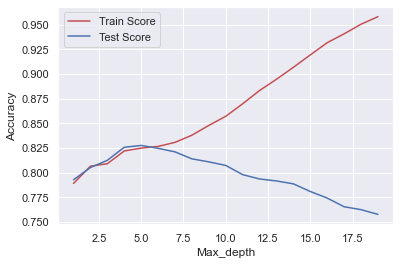

In [169]:
x_axis = range(1,20)

plt.plot(x_axis, train_score_array_dtree, label = 'Train Score', c = 'r')
plt.plot(x_axis, test_score_array_dtree, label = 'Test Score', c = 'b')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()

>  Approximately around max_depth = 6 test score is dropping and train score is increasing. So max_depth = 6 will be intital parameter

In [170]:
dtree = DecisionTreeClassifier(max_depth = 6)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print('Train score: {:.4f} %'.format(dtree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(dtree.score(X_test, y_test)*100))

Train score: 82.6578 %
Test score: 82.4667 %


<b>Decision Tree Feature Selection</b>

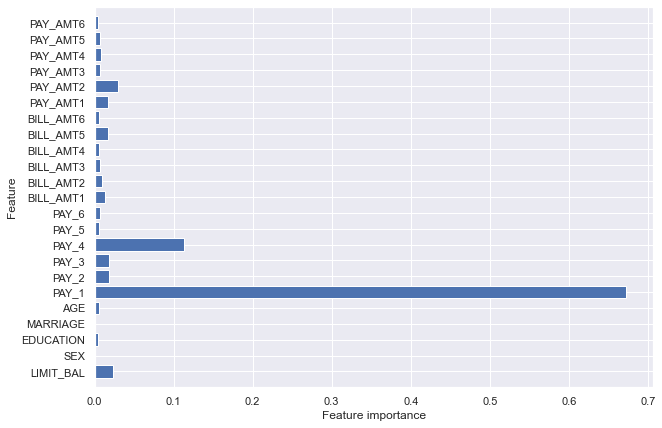

In [171]:
%matplotlib inline
def plot_feature_importances_CDH(model):
    sns.set(rc={'figure.figsize':(10,7)})
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_CDH(dtree)

> PAY_1 is coming as most important feature

<b>Cross validation scores for Decision Tree Classifier with folds</b>

In [172]:
dtree_scores = cross_val_score(dtree, X_train,y_train, cv = 10)

pd.DataFrame({"Cross-Validation scores": dtree_scores})

,Cross-Validation scores
0,0.820889
1,0.816444
2,0.820889
3,0.819111
4,0.823111
5,0.817778
6,0.817778
7,0.814667
8,0.819111
9,0.826222


In [173]:
print("Average cross-validation score: {:.2f}".format(dtree_scores.mean()))

Average cross-validation score: 0.82


<b>Applying Grid Search with Decision Tree Classifier</b>

In [174]:
from pprint import pprint
pprint(dtree.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [175]:
param_grid_dtree = {'max_depth' : range(1,20), 'min_samples_leaf' : range(2,50)}

CV_dtree_class = GridSearchCV(estimator = dtree, cv = 10, param_grid = param_grid_dtree , scoring = 'recall', verbose = 1, n_jobs = -1)
GS_results_dtree = CV_dtree_class.fit(X_train, y_train)

best_parameters_dtree_class = CV_dtree_class.best_params_
print(best_parameters_dtree_class)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 9120 out of 9120 | elapsed: 13.0min finished


{'max_depth': 4, 'min_samples_leaf': 2}


In [176]:
round(CV_dtree_class.score(X_test,y_test),4)

0.3533

In [177]:
print("Best score- Decision Tree grid serach: ")
GS_results_dtree.best_score_


Best score- Decision Tree grid serach: 


0.36748389962247396

In [178]:
print("Best parameters- Decision Tree grid serach: ")
GS_results_dtree.best_params_

Best parameters- Decision Tree grid serach: 


{'max_depth': 4, 'min_samples_leaf': 2}

<b>Using Best parameters from GridSearch for Decision Tree Classifier</b>

In [179]:
best_dtree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2)

best_dtree.fit(X_train, y_train)
y_pred_dtree = best_dtree.predict(X_test)

print('Train score: {:.4f} %'.format(best_dtree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(best_dtree.score(X_test, y_test)*100))

Train score: 82.2000 %
Test score: 82.5733 %


In [180]:
print(classification_report(y_pred = y_pred_dtree, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      5946
         1.0       0.65      0.35      0.46      1554

    accuracy                           0.83      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.81      0.83      0.81      7500



In [181]:
print(confusion_matrix(y_pred = y_pred_dtree, y_true = y_test))

[[5644  302]
 [1005  549]]


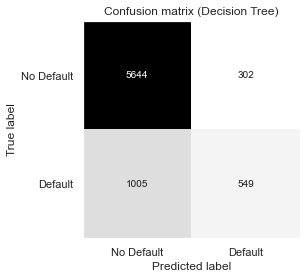

In [182]:
%matplotlib inline

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_pred = y_pred_dtree, y_true = y_test), xlabel = 'Predicted label',
    ylabel='True label', xticklabels = ['No Default','Default'],
    yticklabels=['No Default','Default'], cmap = plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix (Decision Tree)")
plt.gca().invert_yaxis()

In [183]:
Decision_recall_score = recall_score(y_test, best_dtree.predict(X_test))
print('Recall score : {:.4f}'.format(recall_score(y_test, best_dtree.predict(X_test))))

Recall score : 0.3533


In [184]:
Decision_precision_score = precision_score(y_test,best_dtree.predict(X_test))
print('precision score : {:.4f} '.format(precision_score(y_test, best_dtree.predict(X_test))))

precision score : 0.6451 


In [185]:
Decision_f1_score = f1_score(y_test, best_dtree.predict(X_test))
print('f1 score : {:.4f} '.format(f1_score(y_test, best_dtree.predict(X_test))))

f1 score : 0.4565 


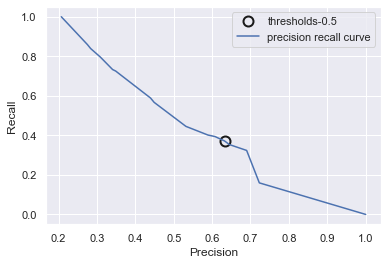

In [186]:
import mglearn
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, best_dtree.predict_proba(X_test)[:,1])

close_zero = np.argmin(np.abs(thresholds-0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="thresholds-0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [187]:
report_table = report_table + [['Decision Tress Classifier', 'Max depth =4', best_dtree.score(X_train, y_train)*100, best_dtree.score(X_test, y_test)*100, f1_score(y_test, best_dtree.predict(X_test)) ]]

<b>For Decision Tree Classifier, there are 302 False Positives and 1005 False Negative. Recall is 0.3533 and F1 score is 0.4565</b>

<center><h2> Conclusion</h2></center>

In [188]:
report = pd.DataFrame(report_table,columns = ['Model name','Model parameter', 'Train accuracy %', 'Test accuracy %', 'F1- score'])
report.index = report['Model name']
report.round(3)

,Model name,Model parameter,Train accuracy %,Test accuracy %,F1- score
Model name,,,,,
KNN Classification,KNN Classification,K=18,79.280,78.853,0.035
Logistic Regression,Logistic Regression,C=100 & max iter =63,78.893,79.280,0.000
Linear SVM Classifier,Linear SVM Classifier,C=10 & Max_iter=141,78.902,79.267,0.000
Kernalized SVM rbg Classifier,Kernalized SVM rbg Classifier,C=0.001 & gamma = 0.001,78.933,75.733,0.000
Kernalized SVM Linear Classifier,Kernalized SVM Linear Classifier,C=0.001 & gamma = 0.001,78.933,75.733,0.000
Kernalized poly SVM Classifier,Kernalized poly SVM Classifier,C=0.001 & gamma = 0.001,78.933,75.733,0.000
Decision Tress Classifier,Decision Tress Classifier,Max depth =4,82.200,82.573,0.457


From above results, F1 score for Logistic, linear SV and Kernelized SVM is 0,  as it accurately predicted true positives. But test accuracy for decision tree is highest.
In this case, we need to know who will default so precision / F-1 score will be good parameter to select best model.
We have used confusion matrix to determine best model because from that we can determine various characteristics of model like true positives, true negatives, false positive which helps to determine overall accuracy,precision, recall rate. We have used  Currently we dont have any false positive in logistic and SVM models so precision and recall are zero but addition of 1 false positive will result in small precision and very large recall. In order to avoid this discrepancy we have used F-1 score as indicator variable.
So to conclude, for our data Logistic regression model has highest accuracy and best F1-score.